<a href="https://colab.research.google.com/github/mazed9/automatic_number_plate_recognition-opencv_easyocr/blob/main/ANPR_opencv_easyocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install easyocr
!pip install imutils

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import easyocr
import imutils

#Read Image

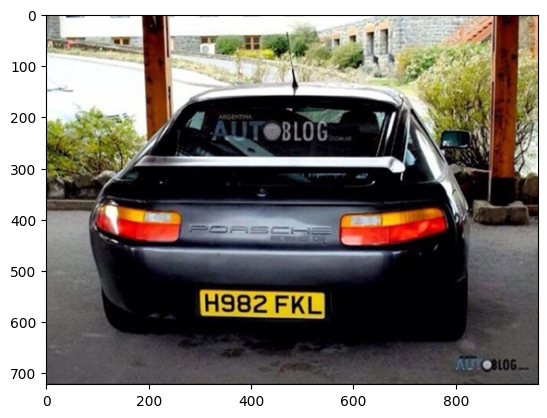

In [3]:
img=cv2.imread("image4.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

This is the original image on which we're gonna perform number plate recognition.

#Grayscaly image and detect edges.


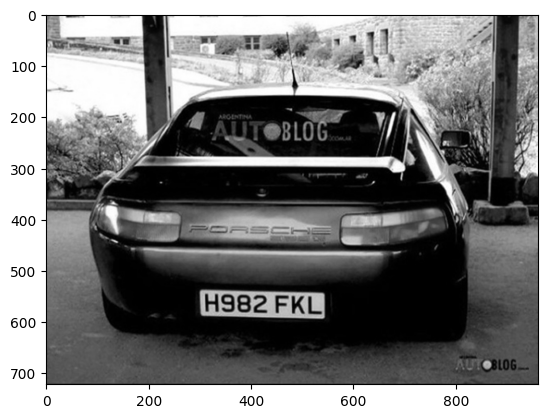

In [4]:
#grayscale
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

In [5]:
#reduce noise
smoothed= cv2.bilateralFilter(gray, 11, 17, 17)

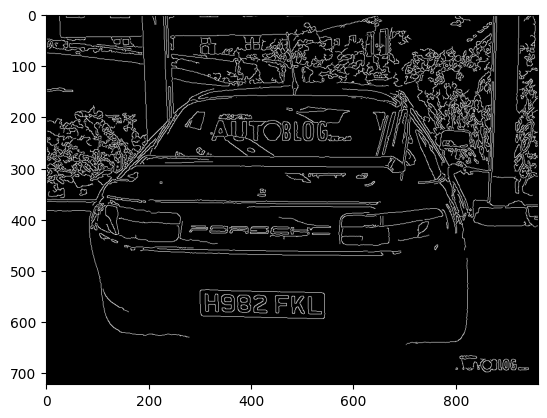

In [6]:
#detect edges
edged= cv2.Canny(smoothed, 30, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

#Find Contours

In [7]:
keypoints= cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#extract contours from keypoints
contours= imutils.grab_contours(keypoints)
#take the ten largest contours based on their area
contours= sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [8]:
#find the rectangular contour that we need
Location= None
for contour in contours:
  approx=cv2.approxPolyDP(contour, 20, True)
  if len(approx)==4:
    Location=approx

Location

array([[[300, 541]],

       [[538, 543]],

       [[543, 591]],

       [[306, 589]]], dtype=int32)

#Apply Mask

In [9]:
mask= np.zeros(gray.shape, np.uint8)
mask=cv2.drawContours(mask, [Location], 0,255,-1)
new_img= cv2.bitwise_and(img, img, mask=mask)

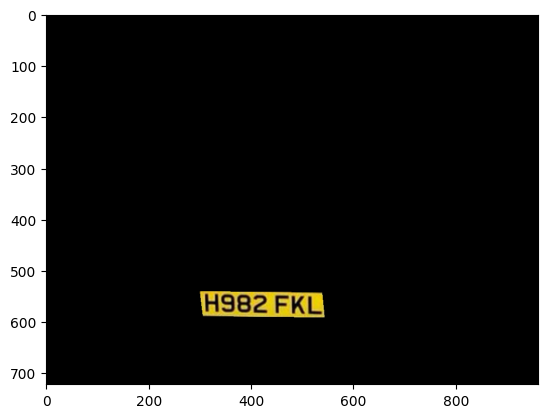

In [10]:
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))

#Read Text using Easyocr

In [11]:
reader= easyocr.Reader(['en'])
result= reader.readtext(new_img)


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [12]:
result

[([[299, 537], [544, 537], [544, 592], [299, 592]],
  'H982 FKL',
  0.6927042315364823)]

In [13]:
text= result[0][-2]
text

'H982 FKL'

#Render result

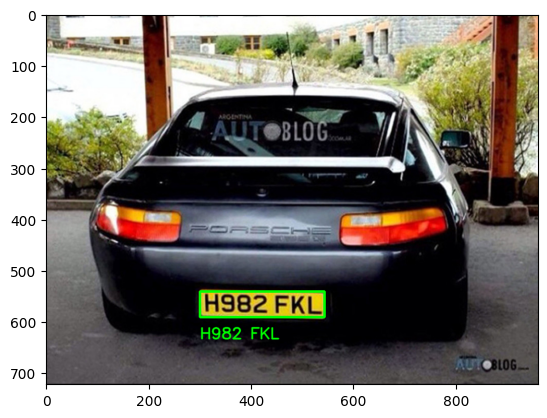

In [14]:
font = cv2.FONT_HERSHEY_SIMPLEX
res= cv2.putText(img, text=text, org=(Location[0][0][0], Location[1][0][1]+90), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res= cv2.rectangle(img, tuple(Location[0][0]), tuple(Location[2][0]), (0,255,0), 3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))